## Regresión lineal
La regresión lineal es un método numérico para calcular los parámetros $m$ y $b$ de la ecuación de la recta (Eq. 1) en datos.
$$
y=mx+b
$$

En este notebook se usaran datos reales y datos creados con perturbaciones.

In [2]:
# importamos libreria para crear los datos
import numpy as np
# importamos libreria para crear graficas
import matplotlib.pyplot as plt

Crearemos datos con pequeñas pertubaciones que esten relacionados a una función lineal que nosotros le demos, esto sera con los siguientes pasos
+ Definir una función lineal
+ Crear una variable aleatoria x 
+ Sumar o restar un numero aleatorio a cada f(x)


In [22]:
def f(x,m,b):
    """
    funcion lineal
    """
    return m*x+b

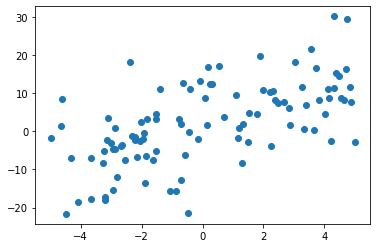

In [103]:
inputs = {
    "m": 2,
    "b": 1,
    "maximum": 5,
    "minimum": -5,
    "points": 100
}
x = np.random.uniform(
    inputs["minimum"],
    inputs["maximum"],
    inputs["points"]
)
y = f(
    x,
    inputs["m"],
    inputs["b"],
) + np.random.uniform(
    inputs["minimum"],
    inputs["maximum"],
    inputs["points"]
) * np.random.uniform(
    inputs["minimum"],
    inputs["maximum"],
    inputs["points"]
)
plt.scatter(x, y)

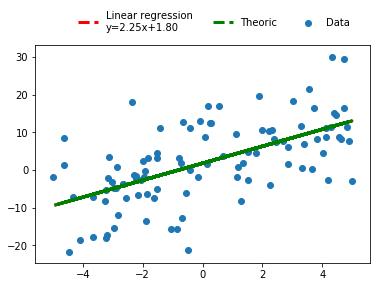

In [106]:
m,b = np.polyfit(x, y, 1)
y_fit = m * x + b
y_theoric=inputs["m"]*x+inputs["b"]
if b > 0:
    pm = "+"
else:
    pm = "-"
equation="y={:.2f}x{}{:.2f}".format(m, pm, abs(b))
plt.plot(x, y_fit, color="red", ls="--", label="Linear regression\n"+equation,lw=3)
plt.plot(x, y_fit, color="green", ls="--", label="Theoric",lw=3)
plt.scatter(x, y, label="Data")
plt.legend(frameon=False,ncol=3,loc="upper left",bbox_to_anchor=(0.1,1.2))
plt.show()

In [107]:
# Calculamos la diferencia relativa de los parametros
def RD(measurement,theoric):
    rd=abs((measurement-theoric)/theoric)*100
    return rd
rd_m=RD(m,inputs["m"])
rd_b=RD(b,inputs["b"])
print("Diferencia relativa de M es {:.2f}%".format(rd_m))
print("Diferencia relativa de B es {:.2f}%".format(rd_b))

Diferencia relativa de M es 12.68%
Diferencia relativa de B es 80.04%


Llevando este ejemplo al uso de clases el código es el siguiente

In [126]:
class linear_regression:
    def __init__(self, m, b, points, minimum, maximum):
        self.m = m
        self.b = b
        self.points = points
        self.maximum = maximum
        self.minimum = minimum
        self.create_random_points()

    def create_random_points(self):
        """
        Funcion que crea los valores aleatorios de x y crea pequeñas perturbaciones
        en los resultados de f(x), estos son usados para calcular la regresion lineal
        """
        self.x = np.random.uniform(self.minimum, self.maximum, self.points)
        self.y = self.f() + np.random.uniform(
            self.minimum,
            self.maximum,
            self.points,
        ) * np.random.uniform(
            self.minimum,
            self.maximum,
            self.points,
        )

    def f(self):
        return self.m * self.x + self.b

    def obtain_linear_regression(self):
        """
        funcion que calcula la regresión lineal a partir de datos
        """
        self.m_lr, self.b_lr = np.polyfit(self.x, self.y, 1)
        self.format_equation()

    def format_equation(self):
        """
        funcion que formatea la ecuación calculada con la regresion
        lineal
        """
        if self.b_lr > 0:
            pm = "+"
        else:
            pm = "-"
        self.equation = "y={:.2f}x{}{:.2f}".format(self.m_lr, pm,
                                                   abs(self.b_lr))
    def obtain_RD(self):
        """
        funcion que ejecuta el calculo de la diferencia relativa de los 
        parametros y escribe en pantalla sus resultados
        """
        m_rd=self.RD(self.m_lr,self.m)
        b_rd=self.RD(self.b_lr,self.b)
        self.write_RD("m",m_rd)
        self.write_RD("b",b_rd)
    
    def RD(self,measurement,theoric):
        """
        funcion que calcula la diferencia relativa en porcentajes
        """
        rd=abs((measurement-theoric)/theoric)*100
        return rd
    
    def write_RD(self,parameter,percentage):
        """
        Funcion que escribe los resultados de la diferencia relativa        
        """
        print("Diferencia relativa de {} es {:.2f}%".format(parameter,
                                                           percentage))

    def plot_results(self):
        """
        funcion que realiza la grafica de los datos, la función teorica
        y la regresión lineal calculada
        """
        y_fit = self.m_lr * self.x + self.b_lr
        y_theo = self.m * self.x + self.b
        plt.plot(self.x,
                 y_fit,
                 color="red",
                 ls="--",
                 label="Linear regression\n" + self.equation,
                 lw=3)
        plt.plot(self.x, y_fit, color="green", ls="--", label="Theoric", lw=3)
        plt.scatter(self.x, self.y, label="Data")
        plt.legend(frameon=False,
                   ncol=3,
                   loc="upper left",
                   bbox_to_anchor=(0.1, 1.2))
        plt.show()

Diferencia relativa de m es 32.87%
Diferencia relativa de b es 45.75%


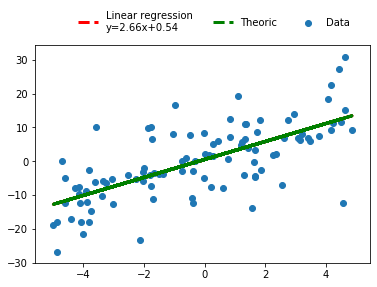

In [125]:
inputs = {
    "m": 2,
    "b": 1,
    "maximum": 5,
    "minimum": -5,
    "points": 100,
}
problem = linear_regression(
    inputs["m"],
    inputs["b"],
    inputs["points"],
    inputs["minimum"],
    inputs["maximum"],
)
problem.create_random_points()
problem.obtain_linear_regression()
problem.obtain_RD()
problem.plot_results()